In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 60)

import os
import matplotlib.pyplot as plt
%matplotlib inline
# Set default font size
plt.rcParams['font.size'] = 24

import seaborn as sns
sns.set(font_scale = 2)

from IPython.core.pylabtools import figsize

from sklearn.model_selection import train_test_split

## Load data and data cleaning process

In [2]:
os.getcwd()

'/home/yilin/tutorial'

In [3]:
#PATH = "/tutorial"
#excel = os.path.join(PATH, "nyc_benchmarking_disclosure_data_reported_in_2017.xlsb")
data = pd.read_excel("nyc_benchmarking_disclosure_data_reported_in_2016.xlsx", sheet_name = "2015 Data Reported in 2016")

In [4]:
data.head()

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,Street Name,Zip Code,Borough,DOF Benchmarking Submission Status,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Municipally Supplied Potable Water - Indoor Intensity (gal/ft²),Release Date,DEP Provided Water Use (kgal),Automatic Water Benchmarking Eligible,Reported Water Method
0,4113711.0,1,1.003360e+09,NaN,NaN,1088884,16 Bialystoker Place,Not Applicable: Standalone Property,Not Applicable: Standalone Property,15.0,BIALYSTOKER PLACE,10002.0,Manhattan,In Compliance,Multifamily Housing,Multifamily Housing,Multifamily Housing,98000.0,Not Available,Not Available,Not Available,Not Available,1982,1.0,100.0,Whole Building,Not Available,87.0,73.7,74.4,5.3,0.6,115.0,115.7,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,5463399.1,55261.4,1762214.1,516475.3,436.3,290.2,146.1,98052.0,98000.0,NaN,NaN,2016-04-13 11:08:48,NaN,NaN,NaN
1,4630135.0,2,1.010618e+09,NaN,NaN,1026728,(7478) - 432 West 52nd Street Condominium,Not Applicable: Standalone Property,Not Applicable: Standalone Property,432.0,WEST 52 STREET,10019.0,Manhattan,In Compliance,Multifamily Housing,Multifamily Housing,Multifamily Housing,57401.0,Not Available,Not Available,Not Available,Not Available,1950,1.0,95.0,Whole Building,Whole Building,79.0,51.3,50.9,7.5,0.3,108.8,107.1,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,1437732.8,14515.6,1507302.8,431480.2,201.4,76.4,125.0,58851.0,57401.0,768.5,13.39,2016-04-26 21:52:05,NaN,Not Eligible,NaN
2,4626594.0,3,1.014270e+09,NaN,NaN,1043974,(9250) - 250 East 73rd Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1393.0,2 AVENUE,10021.0,Manhattan,In Compliance,Multifamily Housing,Multifamily Housing,Multifamily Housing,166433.0,Not Available,Not Available,Not Available,Not Available,1964,1.0,95.0,Whole Building,Whole Building,80.0,44.9,44.5,8.2,0.2,106.7,105.2,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,2739020.0,27390.2,4737201.3,1365852.0,538.4,145.5,392.9,166432.0,166433.0,11901.5,71.51,2016-04-26 22:56:36,11897.0,Eligible,Manual
3,4626608.0,4,1.015180e+09,NaN,NaN,1048117,(9141) - 141 East 89th Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1341.0,LEXINGTON AVENUE,10128.0,Manhattan,In Compliance,Multifamily Housing,Multifamily Housing,Multifamily Housing,114939.0,Not Available,Not Available,Not Available,Not Available,1960,1.0,95.0,Whole Building,Whole Building,10.0,91.3,90.8

In [5]:
data = data.replace({"Not Available" : np.nan, "See Primary BBL" : np.nan})

for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)

Your selected dataframe has 57 columns.
There are 55 columns that have missing values.


,Missing Values,% of Total Values
District Hot Water Use (kBtu),13223,100.0
Fuel Oil #1 Use (kBtu),13217,100.0
District Chilled Water Use (kBtu),13213,99.9
Diesel #2 Use (kBtu),13202,99.8
Co-reported BBL Status,12608,95.3
BBLs Co-reported,12608,95.3
Fuel Oil #5 & 6 Use (kBtu),12424,94.0
District Steam Use (kBtu),12291,93.0
Fuel Oil #4 Use (kBtu),11800,89.2
3rd Largest Property Use Type - Gross Floor Area (ft²),11723,88.7


In [7]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df["% of Total Values"] > 50].index) #columns to be removed
print("We will remove %d columns" % len(missing_columns))

Your selected dataframe has 57 columns.
There are 55 columns that have missing values.
We will remove 17 columns


In [8]:
print(missing_columns)
data = data.drop(columns = list(missing_columns))
data.columns

['District Hot Water Use (kBtu)', 'Fuel Oil #1 Use (kBtu)', 'District Chilled Water Use (kBtu)', 'Diesel #2 Use (kBtu)', 'Co-reported BBL Status', 'BBLs Co-reported', 'Fuel Oil #5 & 6 Use (kBtu)', 'District Steam Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', '3rd Largest Property Use Type - Gross Floor Area (ft²)', '3rd Largest Property Use Type', 'Fuel Oil #2 Use (kBtu)', '2nd Largest Property Use - Gross Floor Area (ft²)', '2nd Largest Property Use Type', 'Reported Water Method', 'DEP Provided Water Use (kgal)', 'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)']


Index(['Record Number', 'Order', 'NYC Borough, Block and Lot (BBL)',
       'Reported NYC Building Identification Numbers (BINs)', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'Street Number',
       'Street Name', 'Zip Code', 'Borough',
       'DOF Benchmarking Submission Status',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Source EUI (kBtu/ft²)', 'Weather Normalized Source EUI (kBtu/ft²)',
       'Natural Gas Use (kBtu)',
       'Weather Normalize

## Exploratory Data Analysis

Global Object: Select Features to predict ENERGY STAR Score

In [9]:
data = data.rename(columns = {"ENERGY STAR Score" : "score"})

### Histogram (Single Value Plot)

Text(0.5, 1.0, 'Energy Star Score Distribution')

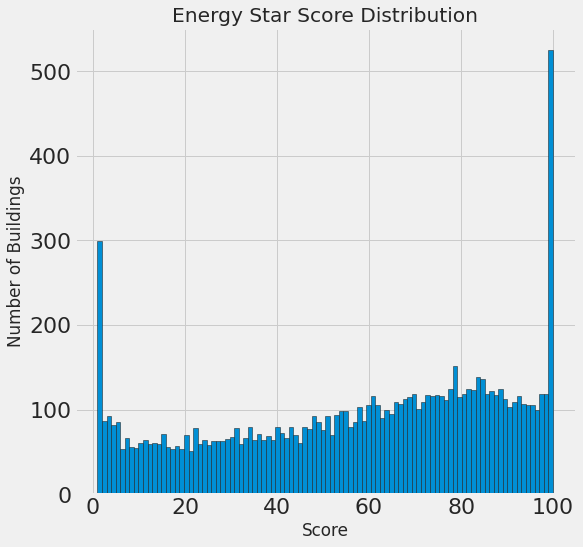

In [10]:
figsize(8,8)
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins=100, edgecolor = 'k')
plt.xlabel('Score'); plt.ylabel('Number of Buildings')
plt.title("Energy Star Score Distribution")

EUI = total energy use divided by the square footage of the building

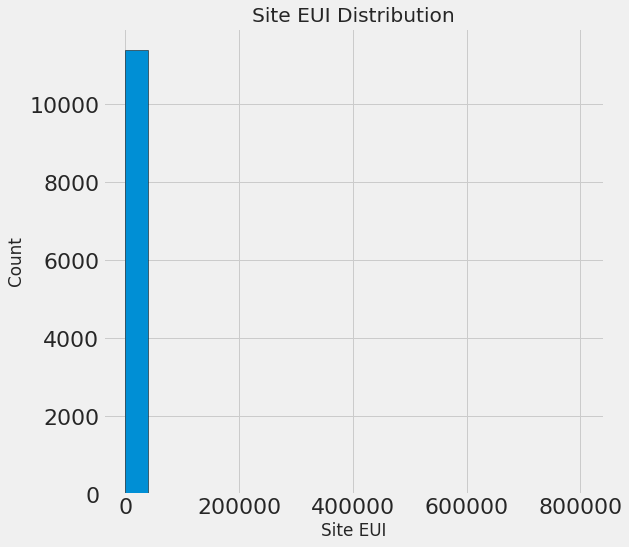

In [11]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

We have to solve the problem of outliers

In [12]:
data['Site EUI (kBtu/ft²)'].describe()

count     11439.000000
mean        525.733377
std       10120.105154
min           0.000000
25%          65.300000
50%          82.400000
75%         103.000000
max      801504.700000
Name: Site EUI (kBtu/ft²), dtype: float64

In [13]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(20)

8478     72105.8
135      73997.8
1457     83876.2
2987     84871.7
9157     86705.7
2936     87334.9
1985     87343.4
2918     91522.0
1874     93228.8
246      99135.6
7324    105263.6
8349    105668.0
2579    116258.9
3391    125421.9
3520    131122.7
3555    133017.4
7818    157874.7
461     226594.2
3293    464826.7
8194    801504.7
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data.loc[data['Site EUI (kBtu/ft²)'] == 801504.7, :]

,Record Number,Order,"NYC Borough, Block and Lot (BBL)",Reported NYC Building Identification Numbers (BINs),Property Name,Parent Property Id,Parent Property Name,Street Number,Street Name,Zip Code,Borough,DOF Benchmarking Submission Status,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),DOF Property Floor Area (ft²),Property GFA - Self-reported (ft²),Water Use (All Water Sources) (kgal),Release Date,Automatic Water Benchmarking Eligible
8194,4414323.0,8195,3.028938e+09,"3390250 , 3338313",234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,234.0,SKILLMAN AVENUE,11211.0,Brooklyn,In Compliance,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004.0,1.0,90.0,Whole Building,NaN,1.0,801504.7,798135.7,9.8,7981.0,841652.4,838112.3,4.560365e+10,454120240.2,1971874.7,556522.6,2422392.5,2422229.0,163.5,61811.0,56900.0,2207.4,2016-05-30 18:24:17,Eligible


Now we remove the outliers and plot the histogram again

In [15]:
first_quantile = data['Site EUI (kBtu/ft²)'].describe()["25%"]
third_quantile = data['Site EUI (kBtu/ft²)'].describe()["75%"]

iqr = third_quantile - first_quantile

#remove
data = data[(data["Site EUI (kBtu/ft²)"] > (first_quantile - 3*iqr)) &
           (data["Site EUI (kBtu/ft²)"] < (third_quantile + 3*iqr))]

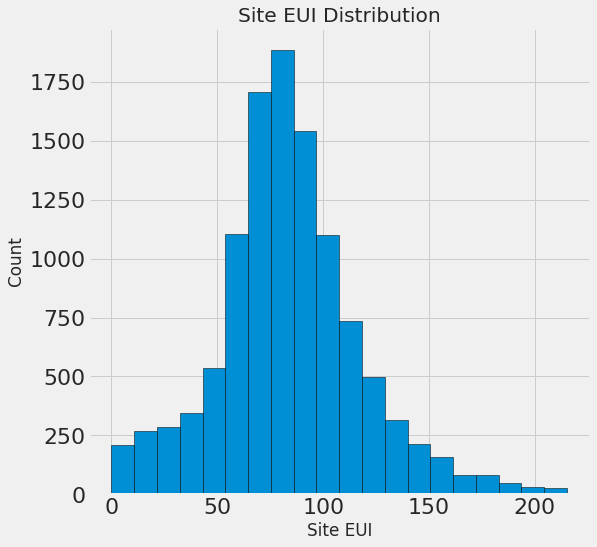

In [16]:
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

### Looking for Relationships

Show distribution of scores by Property Type

In [17]:
types = data.dropna(subset=['score'])
#take properties that have more than 100 counts
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

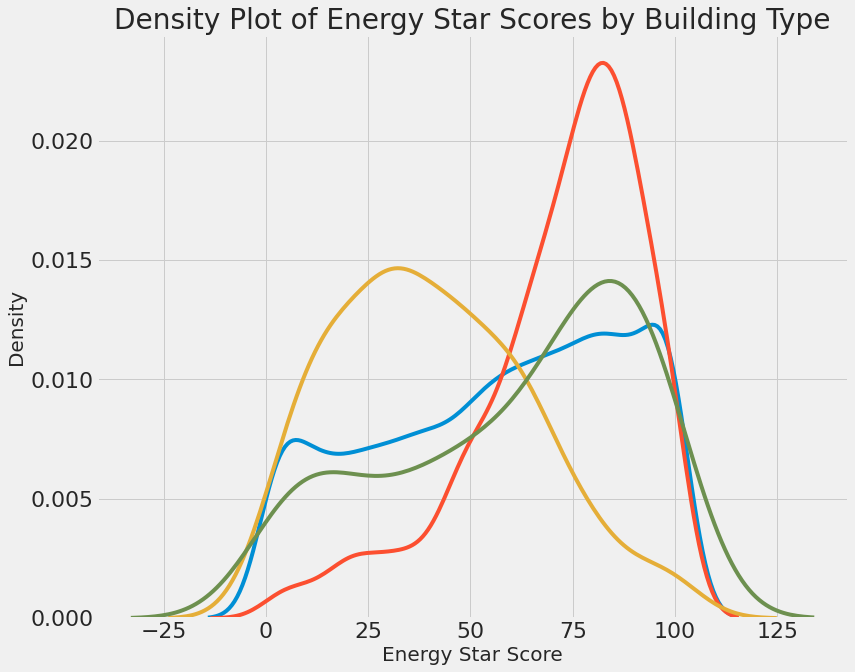

In [18]:
# plot
figsize(12,10)

for b_type in types:
    subdata = data[data["Largest Property Use Type"] == b_type]
    sns.kdeplot(subdata['score'].dropna(), label = b_type)

plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

Conclusion 1: Building type is a categorical variable affecting score

Now we examine another variable: borough

In [19]:
boroughs = data.dropna(subset = ['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)
boroughs

['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']

/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist, = ax.plot(support, density, **artist_kws)
/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:952: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = self.ax.plot([], [], **plot_kws)
/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:995: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ar

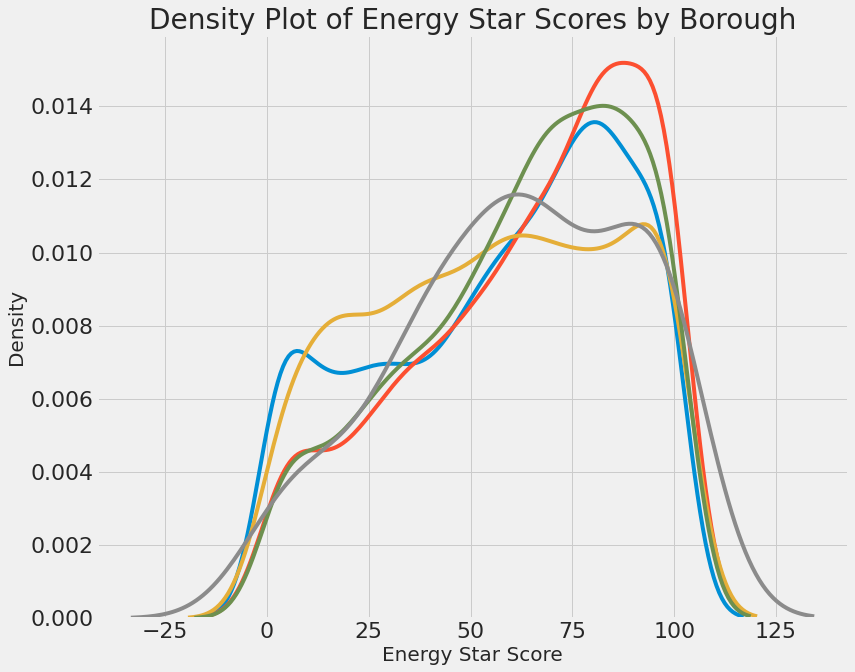

In [20]:
# plot
figsize(12,10)

for borough in boroughs:
    subdata = data[data["Borough"] == borough]
    sns.kdeplot(subdata['score'].dropna(), Label = borough)

plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

### Correlations Between Features and Target

Pearson correlation coefficient: linear relationship

In [21]:
data.corr()['score'].sort_values()

Site EUI (kBtu/ft²)                                          -0.732158
Weather Normalized Site EUI (kBtu/ft²)                       -0.719268
Source EUI (kBtu/ft²)                                        -0.644237
Weather Normalized Source EUI (kBtu/ft²)                     -0.638205
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358950
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.330007
Direct GHG Emissions (Metric Tons CO2e)                      -0.203937
Natural Gas Use (kBtu)                                       -0.187417
Total GHG Emissions (Metric Tons CO2e)                       -0.174630
Weather Normalized Site Natural Gas Use (therms)             -0.173720
Year Built                                                   -0.136361
Electricity Use - Grid Purchase (kBtu)                       -0.092234
Weather Normalized Site Electricity (kWh)                    -0.091131
Number of Buildings - Self-reported                          -0.087896
Indire

Nonlinear relations:

Take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations.

In [22]:
# first select numeric columns
numeric_subdata = data.select_dtypes("number")

#sqrt and log (create new columns)
for col in numeric_subdata.columns:
    if col == "score":
        next
    else:
        numeric_subdata['sqrt_' + col] = np.sqrt(numeric_subdata[col])
        numeric_subdata['log_' + col] = np.log(numeric_subdata[col])

# next select categorical variables: building and borough
categorical_subdata = data[["Borough", "Largest Property Use Type"]]

# one hot encoding
categorical_subdata = pd.get_dummies(categorical_subdata)

# Now join two together to get all the features
features = pd.concat([numeric_subdata, categorical_subdata], axis = 1)
features = features.dropna(subset = ['score'])

# Now find the correlations again
correlations = features.corr()['score'].dropna().sort_values()

<ipython-input-22-ad87423c9244>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subdata['sqrt_' + col] = np.sqrt(numeric_subdata[col])
<ipython-input-22-ad87423c9244>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subdata['log_' + col] = np.log(numeric_subdata[col])
/home/yilin/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.732158
Weather Normalized Site EUI (kBtu/ft²)                         -0.719268
sqrt_Site EUI (kBtu/ft²)                                       -0.709582
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.697853
sqrt_Source EUI (kBtu/ft²)                                     -0.674767
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.669945
Source EUI (kBtu/ft²)                                          -0.644237
Weather Normalized Source EUI (kBtu/ft²)                       -0.638205
log_Source EUI (kBtu/ft²)                                      -0.626459
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.623598
log_Site EUI (kBtu/ft²)                                        -0.616112
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.606679
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.431812
sqrt_Weather Normalized Site Electricity Intensity 

In [24]:
correlations.tail(15)

Largest Property Use Type_Supermarket/Grocery Store                0.023421
Largest Property Use Type_Hospital (General Medical & Surgical)    0.045027
Borough_Queens                                                     0.053721
log_Order                                                          0.060159
log_NYC Borough, Block and Lot (BBL)                               0.063015
sqrt_NYC Borough, Block and Lot (BBL)                              0.066176
sqrt_Order                                                         0.066433
NYC Borough, Block and Lot (BBL)                                   0.068276
Order                                                              0.069615
log_Zip Code                                                       0.080659
sqrt_Zip Code                                                      0.080970
Zip Code                                                           0.081274
Borough_Brooklyn                                                   0.087595
Largest Prop

### Two-variable plots

scatter plot: between 2 numeric variables and use color label to represent categorical variables

/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


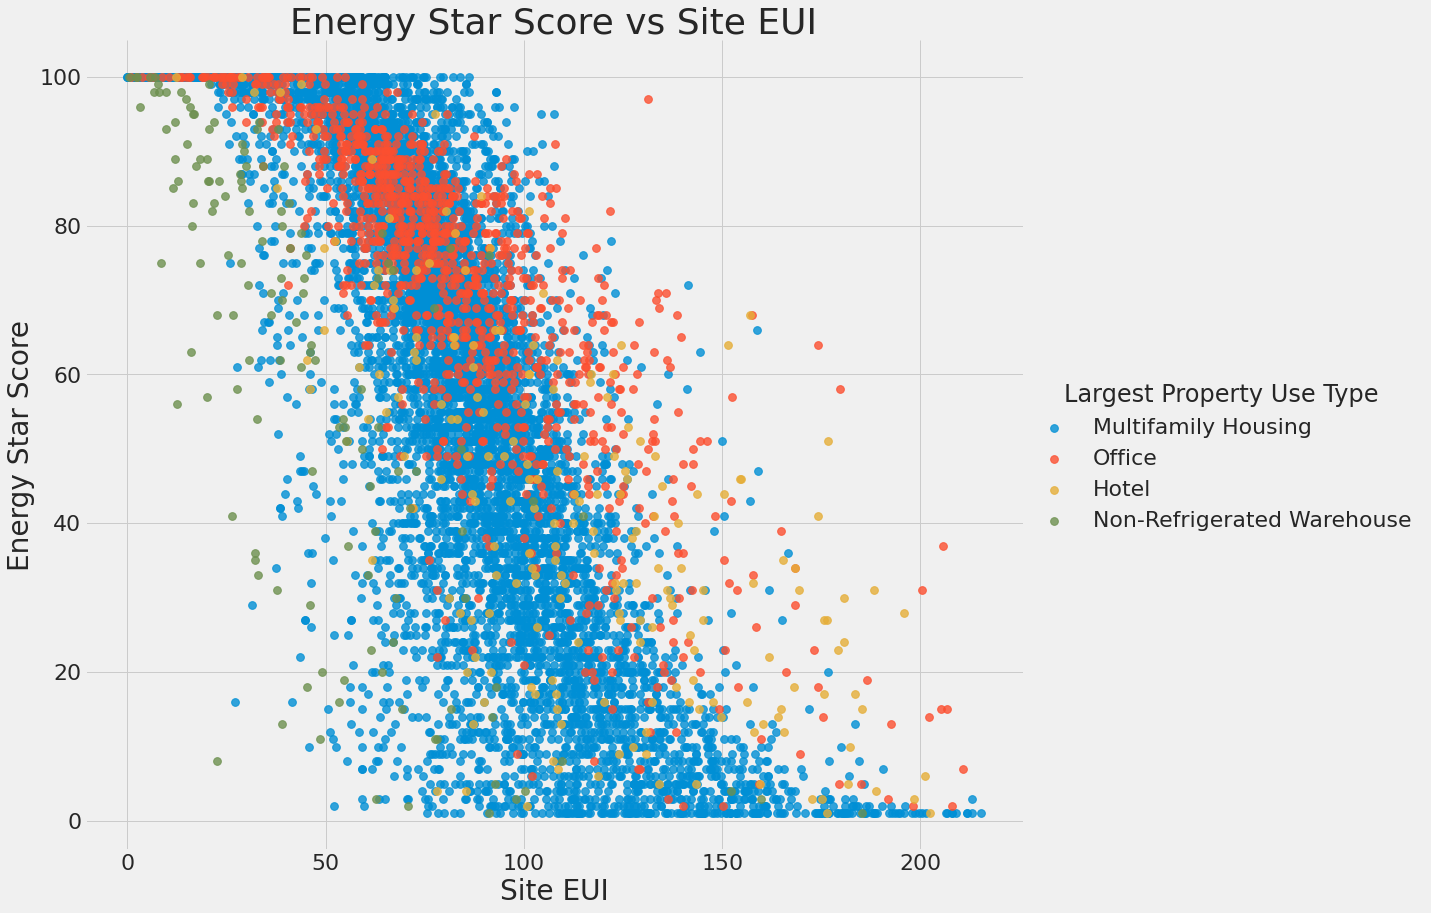

In [25]:
figsize(12,10)

# extract building types again into features (not one hot code)
features["Largest Property Use Type"] = data.dropna(subset = ['score'])['Largest Property Use Type']
# Limit to building types with more than 100 observations (prev)
features = features[features["Largest Property Use Type"].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

Pairs Plot:
Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

/home/yilin/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


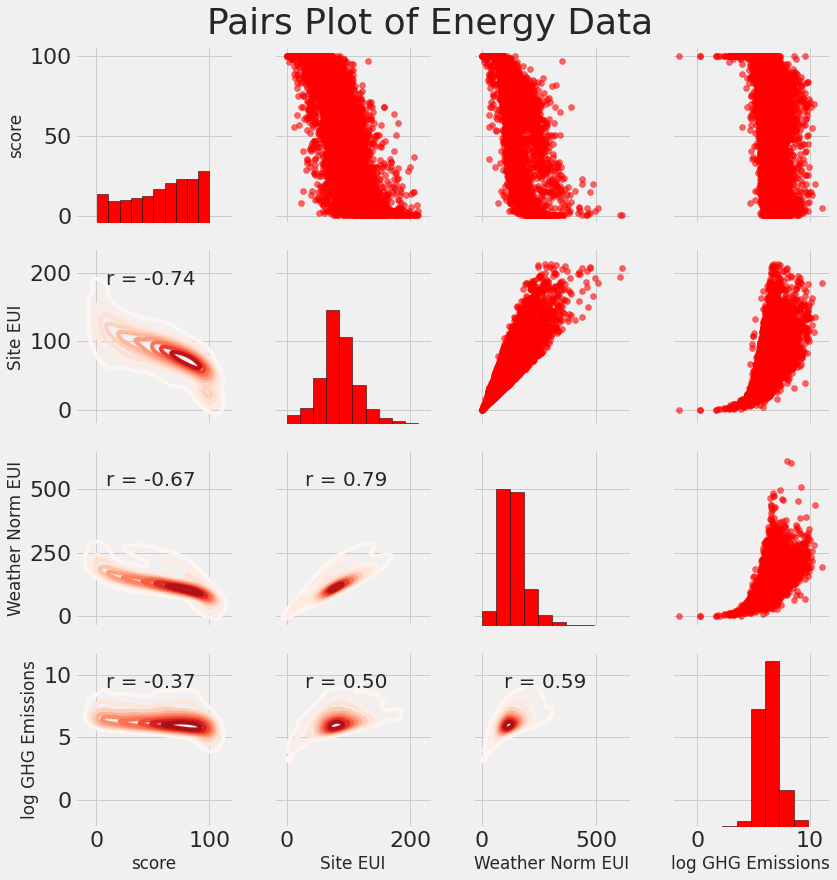

In [26]:
# select variable:
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

## Feature Engineering and Selection

Feature Engineering: adding features (trasformed variables)
- Select only the numerical variables and two categorical variables (borough and property use type)
- Add in the log transformation of the numerical variables
- One-hot encode the categorical variables

Feature Selection: subtractng features
- Remove collinear features

In [27]:
features = data.copy()

# first select numeric columns
numeric_subdata = data.select_dtypes("number")

#sqrt and log (create new columns)
for col in numeric_subdata.columns:
    if col == "score":
        next
    else:
        numeric_subdata['log_' + col] = np.log(numeric_subdata[col])

# next select categorical variables: building and borough
categorical_subdata = data[["Borough", "Largest Property Use Type"]]

# one hot encoding
categorical_subdata = pd.get_dummies(categorical_subdata)

# Now join two together to get all the features
features = pd.concat([numeric_subdata, categorical_subdata], axis = 1)

features.shape

<ipython-input-27-3cb8d914a8d3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_subdata['log_' + col] = np.log(numeric_subdata[col])
/home/yilin/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11174, 105)

### Remove Colinear Features

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

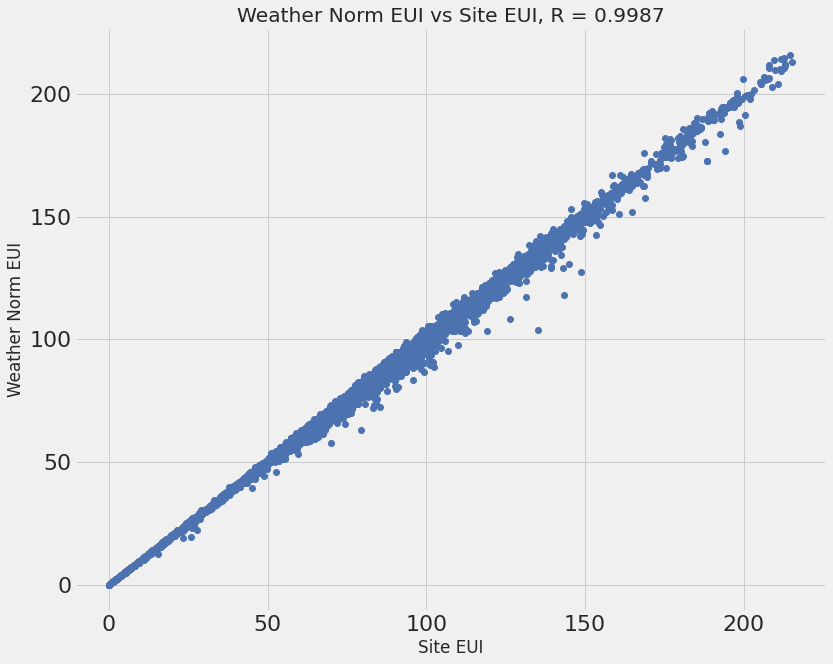

In [28]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [29]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [30]:
features = remove_collinear_features(features, 0.6)

In [31]:
features = features.dropna(axis = 1, how = "all")
features.shape

(11174, 63)

Note that this "features" has the target "Score" inside it.

### Split into Training and Testing Sets

In [41]:
# extract valid observations (with a valid score)

no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1826, 63)
(9348, 63)


In [49]:
# seperate out features and targets
features = score.drop(columns = "score")
targets = pd.DataFrame(score['score'])

features = features.replace({np.inf : np.nan, -np.inf : np.nan})
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.25, random_state = 208)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(7011, 62)
(2337, 62)
(7011, 1)
(2337, 1)


## Establish a Baseline

Baseline guess: a target metric that machine learning models want to beat. If ML models do not outperform this baseline, then there is no need to use ML at all. (or some problem with the approach)

### Metric: Mean Absolute Error (MAE)

Here we use MAE as a baseline of our ML models.

In [50]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [53]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 63.00
Baseline Performance on the test set: MAE = 25.0616


In [54]:
# output the training and testing sets

no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)